Optimized a step
Optimized a step
Optimized a step


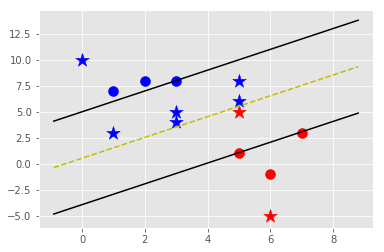

In [7]:
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt


style.use('ggplot')


class SupportVectorMachine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'b'}
        self.fig, self.ax = self.is_visual()

    def fit(self, data):
        self.data = data

        # {||w||: [w, b]}
        opt_dict = {}
        transforms = [[1, 1], [-1, 1], [-1, -1], [1, -1]]
        all_data = []

        for yi in self.data:
            for feature_set in self.data[yi]:
                for feature in feature_set:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        step_sizes = [
            self.max_feature_value * 0.1,
            self.max_feature_value * 0.01,
            self.max_feature_value * 0.001,  # point of expense
        ]

        # extreme expensive
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value * 10

        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False  # we can do this because convex

            while not optimized:
                for b in np.arange(-1 * self.max_feature_value * b_range_multiple,
                                   self.max_feature_value * b_range_multiple, step * b_multiple):
                    for transformations in transforms:
                        w_transformation = w * transformations
                        found_option = True

                        # weakest link in the SVM fundamentally; SMO attempts to fix this a bit; yi(xi.w+b) >= 1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i

                                if not yi * (np.dot(w_transformation, xi) + b) >= 1:
                                    found_option = False

                        if found_option:
                            opt_dict[np.linalg.norm(w_transformation)] = [w_transformation, b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step * 2

    def predict(self, features):
        # sign(x.w + b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        else:
            print('feature_set {} is on the decision boundary'.format(features))

        return classification

    def is_visual(self):
        if self.visualization:
            fig = plt.figure()
            return fig, fig.add_subplot(1, 1, 1)

        return None, None
    
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in self.data[i]] for i in self.data]

        def hyperplane(x, w, b, v):
            return (-w[0]*x-b+v) / w[1]

        hyp_x_min = self.min_feature_value*0.9
        hyp_x_max = self.max_feature_value*1.1

        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')

        plt.show()


data_dict = {
    -1: np.array([[1, 7], [2, 8], [3, 8], ]),
    1: np.array([[5, 1], [6, -1], [7, 3], ])}

predict_us = [[0, 10], [1, 3], [3, 4], [3, 5], [5, 5], [5, 6], [6, -5], [5, 8]]

svm = SupportVectorMachine()
svm.fit(data_dict)

for prediction in predict_us:
    svm.predict(prediction)

svm.visualize()
